In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [3]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# the first cnn layer followed by relu and maxpooling layers


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# the second cnn layer followed by relu and maxpooling layers
          
          
model.add(Flatten())
model.add(Dropout(0.5))
# flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
# dense layer of 50 neurons

model.add(Dense(2,activation='softmax'))
# the final layer with two outputs and two categories


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

history = model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5477 - loss: 0.7498
Epoch 1: val_loss improved from inf to 0.54494, saving model to model-001.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.5480 - loss: 0.7493 - val_accuracy: 0.7324 - val_loss: 0.5449
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7425 - loss: 0.5222
Epoch 2: val_loss improved from 0.54494 to 0.44760, saving model to model-002.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.7426 - loss: 0.5220 - val_accuracy: 0.7868 - val_loss: 0.4476
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7946 - loss: 0.4403
Epoch 3: val_loss improved from 0.44760 to 0.40489, saving model to model-003.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.7946 - loss: 0.4403 - val_accuracy: 0.8154 - val_loss: 0.4049
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8190 - loss: 0.3889
Epoch 4: val_loss improved from 0.40489 to 0.37658, saving mod

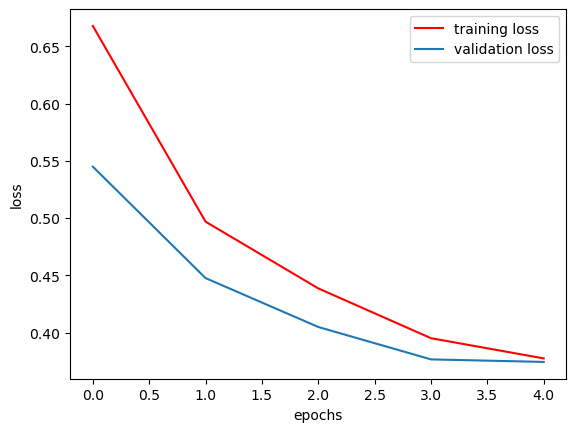

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

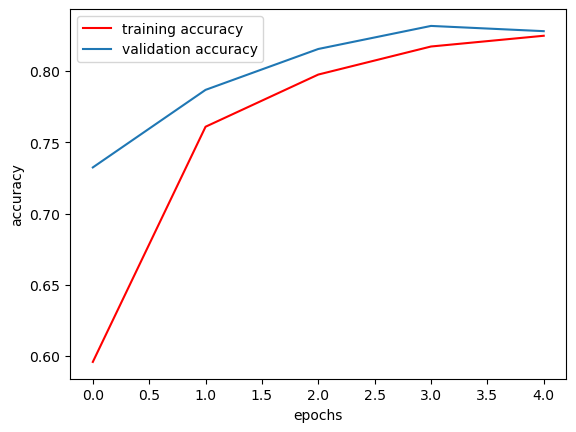

In [15]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
model.save('facedetector.keras')

In [17]:
model=load_model('facedetector.keras')

# show the model architecture
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 200)         │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 200)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 200)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 100)         │         180,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 52900)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 52900)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │       2,645,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,481,758 (32.36 MB)

 Trainable params: 2,827,252 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,654,506 (21.57 MB)

In [18]:
224*224*3


150528